# Importing necsssary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset


In [2]:
data_url = r"C:\Users\Mohamed Makki\Desktop\Projects YAT_133\tmdb-movies.csv"
df = pd.read_csv(data_url)

In [3]:
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


# Processing the data


In [4]:
df.shape

(10866, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

# Drop unimportant columns


In [9]:
df.drop(['id', 'imdb_id', 'cast', 'budget_adj', 'budget_adj', 'homepage', 'tagline', 'overview'], inplace=True, axis=1)

In [10]:
df.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


In [11]:
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [12]:
df.dropna(how='any', subset=['genres', 'director'], inplace=True)

In [13]:
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                   0
keywords                1449
runtime                    0
genres                     0
production_companies     994
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [14]:
df['production_companies'] = df['production_companies'].fillna(0)
df['keywords'] = df['keywords'].fillna(0)

In [15]:
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
revenue_adj             0
dtype: int64

In [16]:
df['popularity'] = df['popularity'].round(2)

In [17]:
df.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


# What is the net profit per movie?


In [18]:
df.insert(3, 'profit', df['revenue'] - df['budget'])

In [19]:
df.head(3)

,popularity,budget,revenue,profit,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


# What is Return on Investment?


In [20]:
df.insert(4, 'ROI', (df['profit'] / df['budget']))

In [21]:
df.head(3)

,popularity,budget,revenue,profit,ROI,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


In [22]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
profit                     0
ROI                     4641
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [23]:
df.ROI.value_counts()

ROI
-1.000000    1311
 inf          995
 1.000000       5
 0.000000       4
 3.000000       4
             ... 
-0.691508       1
-0.528361       1
-0.295646       1
 8.941651       1
 1.346041       1
Name: count, Length: 3818, dtype: int64

In [24]:
not_finity = ~np.isfinite(df['ROI'])

In [25]:
not_finity.sum()

5636

In [26]:
df['ROI'] = df['ROI'].replace([np.inf, -np.inf], np.nan)

In [27]:
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
profit                     0
ROI                     5636
original_title             0
director                   0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
revenue_adj                0
dtype: int64

In [28]:
numerical_columns = df[['popularity', 'budget',	'revenue',	'profit',	'ROI', 'vote_count', 'vote_average', 'release_year']]

# Distribution of Numerical Columns


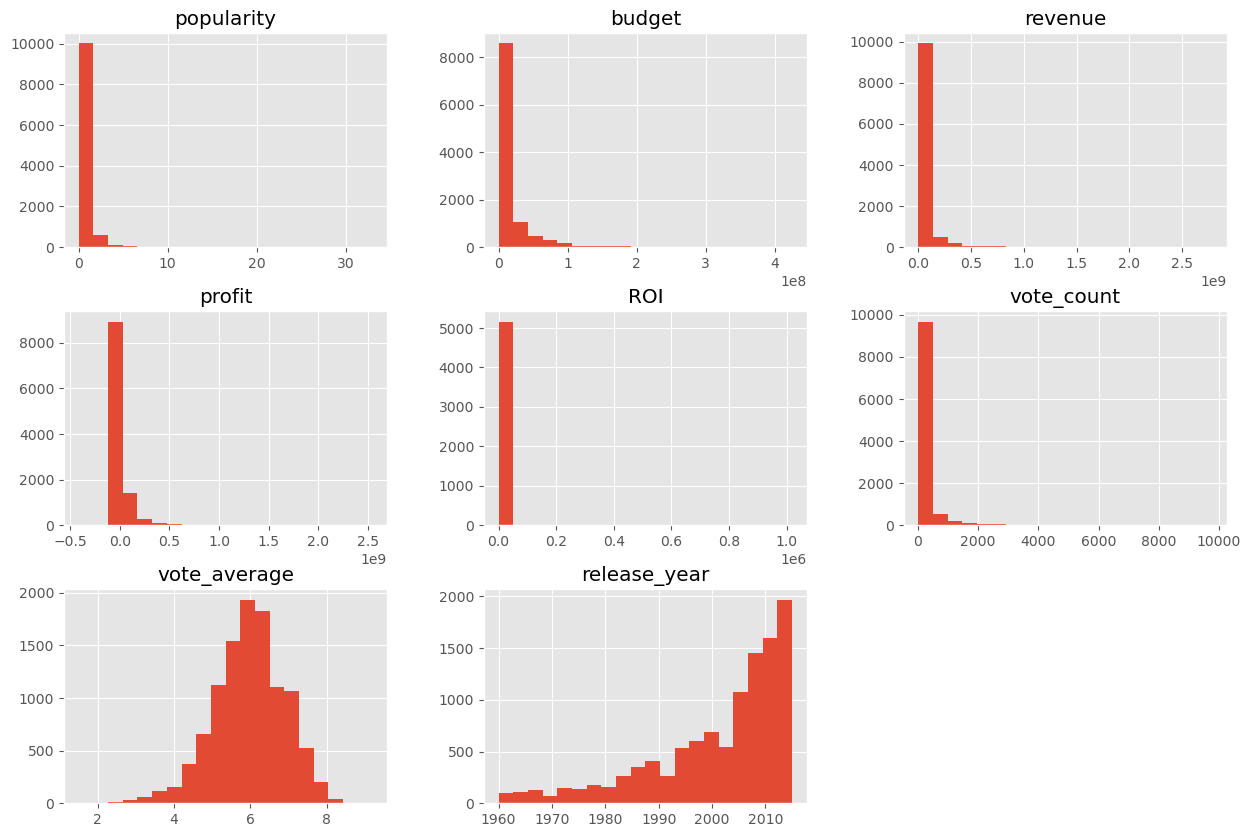

In [29]:
numerical_columns.hist(bins=20, figsize=(15,10))
plt.show()

# Average ROI by Release Year


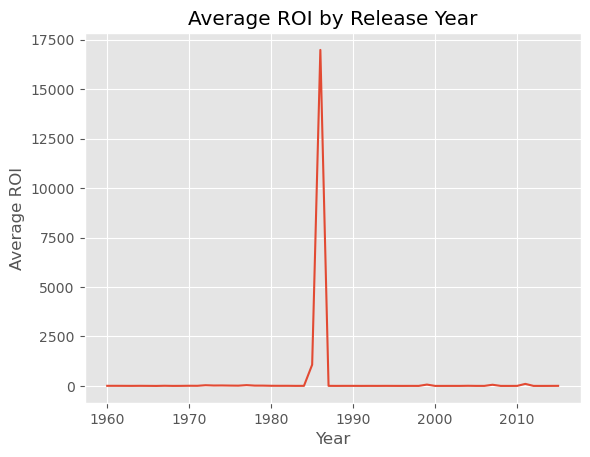

In [30]:
df.groupby('release_year')['ROI'].mean().plot(kind = 'line')
plt.title('Average ROI by Release Year')
plt.xlabel('Year')
plt.ylabel('Average ROI')
plt.show()

# Popularity by Release Year


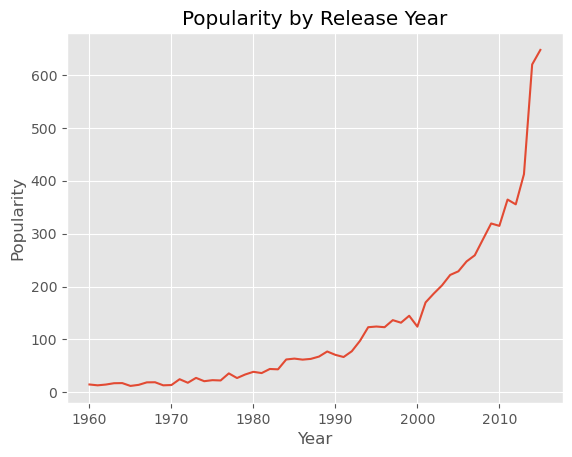

In [31]:
df.groupby('release_year')['popularity'].sum().plot(kind = 'line')
plt.title('Popularity by Release Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()


# Vote Average by Release Year


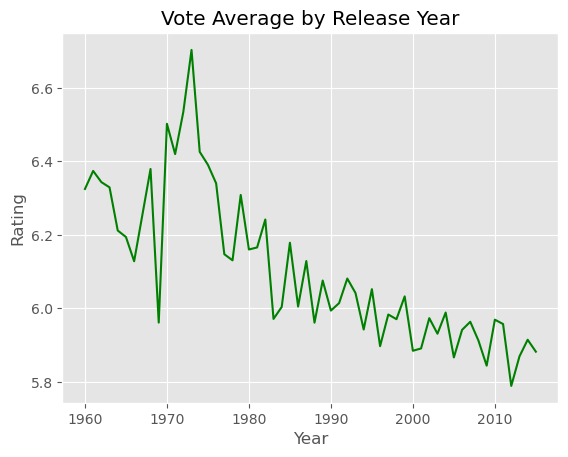

In [32]:
df.groupby('release_year')['vote_average'].mean().plot(kind = 'line', color = 'green')
plt.title('Vote Average by Release Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()


# Popularity vs Vote Average


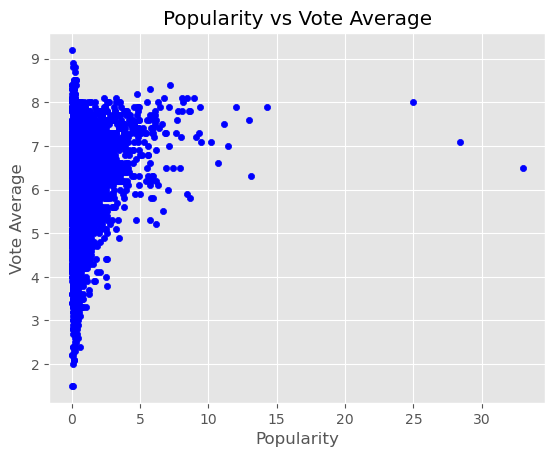

In [33]:
df.plot.scatter(x='popularity', y='vote_average', color='blue')
plt.title('Popularity vs Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

# Convert 'genres' Column to List of Genres by Splitting Strings


In [34]:
df['genres'] = df['genres'].apply(lambda x:  x.split('|'))

In [35]:
df.head(3)

,popularity,budget,revenue,profit,ROI,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


In [36]:
df_genres = df.explode('genres')
df_genres.head(10)

,popularity,budget,revenue,profit,ROI,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2.716190e+08


In [37]:
df_genres.groupby('genres')['popularity'].sum().sort_values(ascending=False)

genres
Drama              2815.43
Comedy             2246.25
Action             2208.08
Thriller           2155.90
Adventure          1697.11
Science Fiction    1230.41
Romance            1013.21
Crime              1009.07
Family              967.06
Fantasy             908.87
Horror              761.39
Animation           594.46
Mystery             558.55
Music               198.15
War                 196.48
History             192.35
Western              97.42
Documentary          93.13
TV Movie             44.03
Foreign              35.24
Name: popularity, dtype: float64

In [38]:
popularity_for_each_genres = df_genres.groupby('genres')['popularity'].sum().sort_values()

# Popularity by Genre


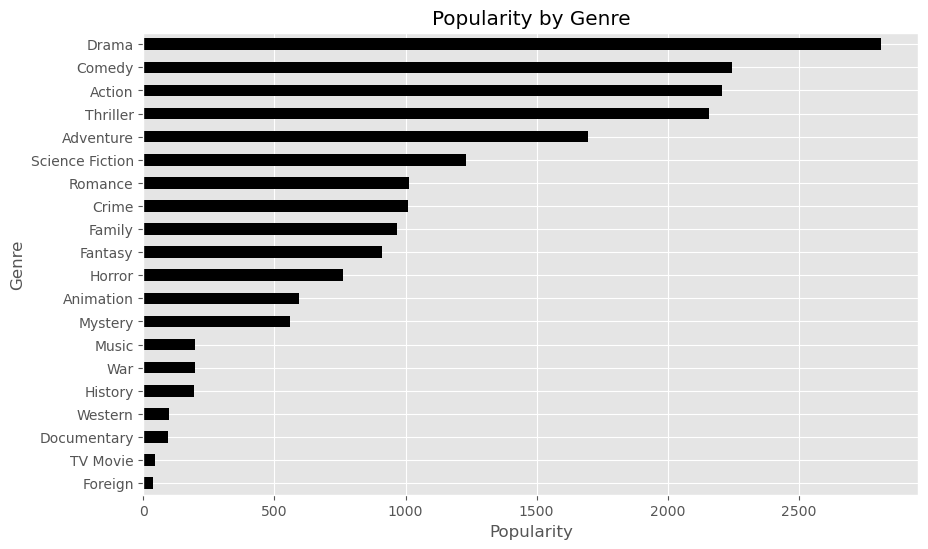

In [39]:
popularity_for_each_genres.plot.barh(x='genres', y='popularity', color='black', figsize=(10, 6))
plt.title('Popularity by Genre')
plt.xlabel('Popularity')
plt.ylabel('Genre')
plt.show()

In [40]:
df.release_date.dtypes # datatype is Object

dtype('O')

# Convert data type from object to datetime for column release date


In [41]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [42]:
df.head(1)

,popularity,budget,revenue,profit,ROI,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.392446e+09


In [43]:
df.insert(12, 'release_month', df['release_date'].dt.month)

In [44]:
df.head(3)

,popularity,budget,revenue,profit,ROI,original_title,director,keywords,runtime,genres,production_companies,release_date,release_month,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,5,6185,7.1,2015,3.481613e+08
2,13.11,110000000,295238201,185238201,1.683984,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,"[Adventure, Science Fiction, Thriller]",Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,3,2480,6.3,2015,2.716190e+08


In [45]:
df.groupby('release_month')['popularity'].sum().sort_values()

release_month
2     406.37
1     421.60
4     448.24
3     528.44
8     535.60
7     596.37
5     606.59
11    614.16
6     662.10
10    705.84
12    738.55
9     751.00
Name: popularity, dtype: float64

# Popularity by Release Month


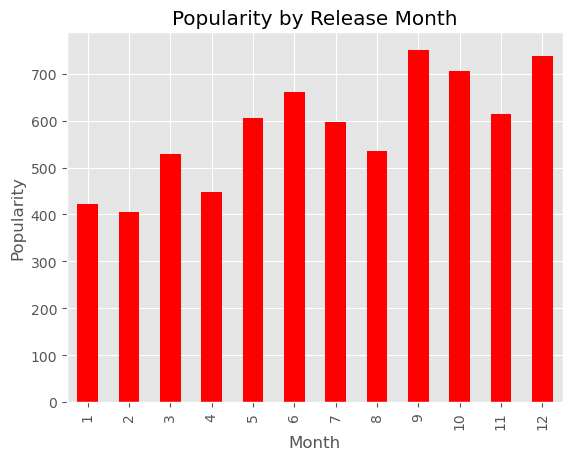

In [46]:
df.groupby('release_month')['popularity'].sum().sort_index().plot(kind = 'bar', color = 'red')
plt.title('Popularity by Release Month')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.show()

In [47]:
import calendar

In [48]:
df['release_month'] = df['release_month'].map(lambda x: calendar.month_name[x])
df.head(2)

,popularity,budget,revenue,profit,ROI,original_title,director,keywords,runtime,genres,production_companies,release_date,release_month,vote_count,vote_average,release_year,revenue_adj
0,32.99,150000000,1513528810,1363528810,9.090192,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,June,5562,6.5,2015,1.392446e+09
1,28.42,150000000,378436354,228436354,1.522909,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,May,6185,7.1,2015,3.481613e+08


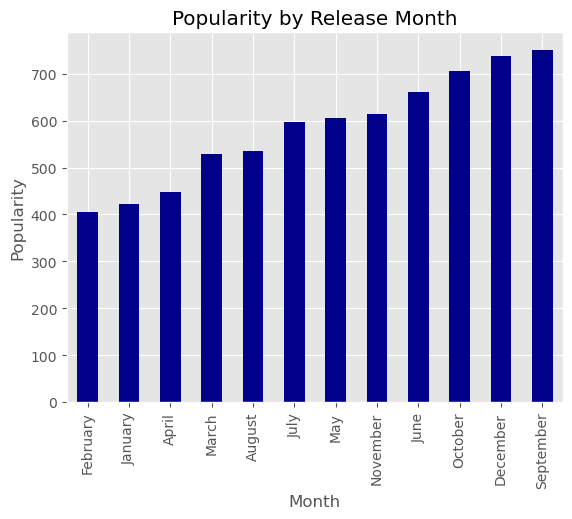

In [49]:
df.groupby('release_month')['popularity'].sum().sort_values().plot(kind = 'bar', color = 'darkblue')
plt.title('Popularity by Release Month')
plt.xlabel('Month')
plt.ylabel('Popularity')
plt.show()

# Revenue by Release Month


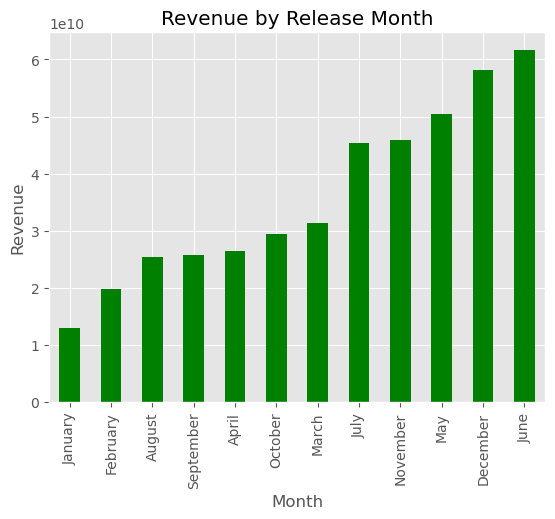

In [50]:
df.groupby('release_month')['revenue'].sum().sort_values().plot(kind = 'bar', color = 'green')
plt.title('Revenue by Release Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# Top 10 Movies By Profit


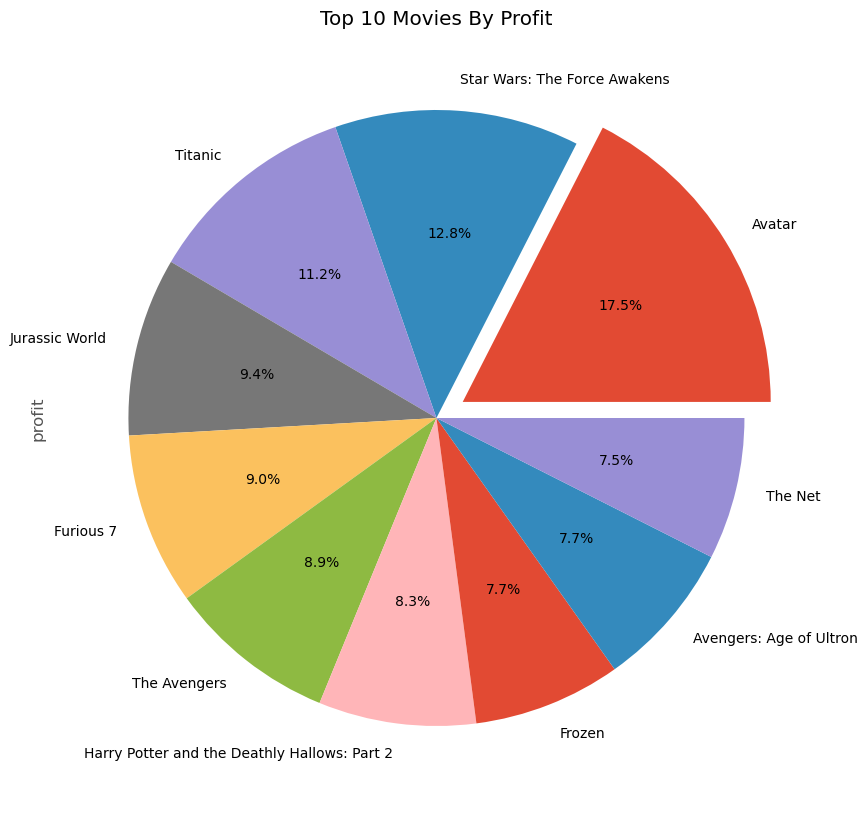

In [51]:
df.groupby('original_title')['profit'].sum().sort_values(ascending = False).head(10).plot(kind = 'pie', autopct='%1.1f%%', explode = [0.1,0,0,0,0,0,0,0,0,0],figsize=(13, 10))
plt.title('Top 10 Movies By Profit')
plt.show()

In [52]:
df['production_companies'].value_counts().head(10)[1:]

production_companies
Paramount Pictures           156
Universal Pictures           133
Warner Bros.                  84
Walt Disney Pictures          75
Metro-Goldwyn-Mayer (MGM)     72
Columbia Pictures             72
New Line Cinema               61
Touchstone Pictures           51
20th Century Fox              50
Name: count, dtype: int64

# Top 10 Movies Production Companies


<Axes: ylabel='count'>

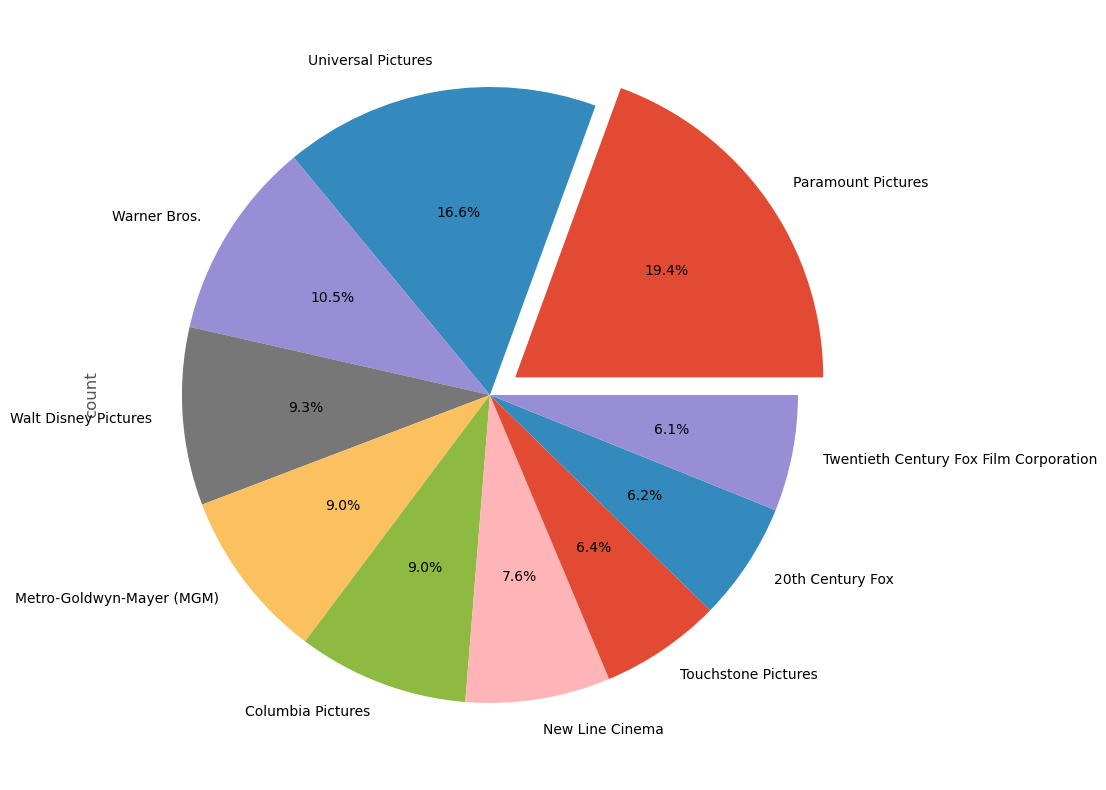

In [53]:
df['production_companies'].value_counts()[1:].head(10).plot(kind = 'pie', autopct='%1.1f%%', explode = [0.1,0,0,0,0,0,0,0,0,0], figsize=(13, 10))

# Top 10 Keywords


In [54]:
px.treemap(df['keywords'].value_counts().head(16)[1:].reset_index(), path=['keywords'], values='count', title='Top 10 Keywords')